In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("creditcard.csv")

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(dataset.shape)

(8563, 31)


In [ ]:
print("Total Null values in the dataset:",dataset.isnull().sum().sum())

Total Null values in the dataset: 27


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8563 non-null   int64  
 1   V1      8563 non-null   float64
 2   V2      8563 non-null   float64
 3   V3      8563 non-null   float64
 4   V4      8562 non-null   float64
 5   V5      8562 non-null   float64
 6   V6      8562 non-null   float64
 7   V7      8562 non-null   float64
 8   V8      8562 non-null   float64
 9   V9      8562 non-null   float64
 10  V10     8562 non-null   float64
 11  V11     8562 non-null   float64
 12  V12     8562 non-null   float64
 13  V13     8562 non-null   float64
 14  V14     8562 non-null   float64
 15  V15     8562 non-null   float64
 16  V16     8562 non-null   float64
 17  V17     8562 non-null   float64
 18  V18     8562 non-null   float64
 19  V19     8562 non-null   float64
 20  V20     8562 non-null   float64
 21  V21     8562 non-null   float64
 22  

In [ ]:
# Checking for duplicate values in the dataset
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape )

Number of duplicate rows:  (39, 31)


In [ ]:
# removing the duplicate values
dataset = dataset.drop_duplicates()
print(dataset.shape)

(8524, 31)


In [ ]:
dataset.describe()
# all the variables except Time and Amount are already scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8524.000000,8524.000000,8524.000000,8524.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4742.293759,-0.258263,0.280521,0.904264,0.214099,-0.036821,0.135269,-0.040276,-0.072229,0.709150,-0.185403,0.684171,-1.114461,0.750954,0.614201,-0.082312,-0.007914,0.277772,-0.032924,-0.057620,0.039332,-0.055225,-0.155234,-0.036931,0.025899,0.088068,0.064668,0.011533,0.002425,64.153797,0.003285
std,3548.420388,1.490324,1.263513,1.093292,1.433705,1.152847,1.306573,1.049147,1.295499,1.153829,1.079128,1.140909,1.515583,1.230967,1.165644,0.976003,0.854503,0.881576,0.791556,0.803750,0.595625,0.927059,0.643188,0.478317,0.597746,0.428859,0.543624,0.398092,0.271581,191.941815,0.057226
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-5.902828,-12.840934,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1655.750000,-1.018768,-0.218938,0.397040,-0.667331,-0.639608,-0.653318,-0.525406,-0.198227,-0.034949,-0.674851,-0.130643,-2.311723,-0.144710,-0.010013,-0.660540,-0.512690,-0.242806,-0.481423,-0.538919,-0.144563,-0.267551,-0.557495,-0.180315,-0.337663,-0.160119,-0.344843,-0.077619,-0.016757,5.000000,0.000000
50%,3757.000000,-0.395686,0.308918,0.941705,0.202238,-0.126725,-0.169755,-0.015540,0.007049,0.684578,-0.298236,0.671973,-1.347116,0.802654,0.682579,0.021220,0.052048,0.235877,0.003456,-0.053236,-0.011814,-0.123776,-0.143902,-0.049103,0.085003,0.122124,0.019539,0.000988,0.017221,15.950000,0.000000
75%,7624.250000,1.142576,0.919484,1.593990,1.109163,0.386283,0.506936,0.508155,0.284809,1.413098,0.219123,1.479290,0.229905,1.687958,1.427509,0.578543,0.555150,0.746572,0.452253,0.454465,0.166312,0.039699,0.250800,0.081400,0.420038,0.359386,0.385473,0.134057,0.078718,52.900000,0.000000
max,11541.000000,1.960497,8.261750,4.101716,9.007147,11.974269,21.393069,34.303177,3.877662,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,6.739384,3.659793,3.365632,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [ ]:
print(dataset['Class'].value_counts())
# The number of fraud transactions is very less as compared to legit transactions

0.0    8495
1.0      28
Name: Class, dtype: int64


In [ ]:
print('Legit Transactions:', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2),'%')
print('Frauds Transactions:', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2),'%')
# the classes are heavily skewed we need to solve this issue later

Legit Transactions: 99.66 %
Frauds Transactions: 0.33 %


Text(0.5, 1.0, 'Class Distributions \n (0: Legit, 1: Fraud)')

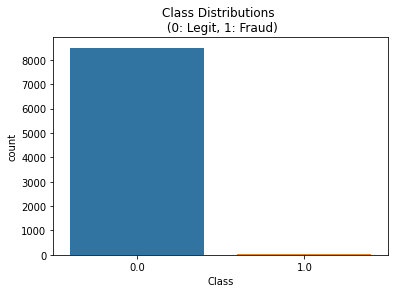

In [ ]:
sns.countplot('Class', data=dataset)
plt.title('Class Distributions \n (0: Legit, 1: Fraud)')

In [ ]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset.drop(['Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = dataset['scaled_amount']

dataset.drop(['scaled_amount'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)

dataset.head()


,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.790605,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.276827,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,7.572234,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.245303,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.128184,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


Extracting independent and dependent variables

In [ ]:
x = dataset.drop(['Time','Class'], axis=1)
y = dataset['Class']


Creating a Subsample

Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes. For that we are going to create a subsample from our dataset, i.e., we will take a small number(equal to the number of fraud transactions) of Legit transaction and combine them with fraud transactions. So that our subsample will have equal number of legit and fraud transactions and out model will trian correctly. We'll shuffle the data before creating the subsample.

In [ ]:
dataset = dataset.sample(frac=1)

fraud_dataset = dataset.loc[dataset['Class'] == 1]                            # Extracting fraud transactions
legit_dataset = dataset.loc[dataset['Class'] == 0][:473]                      # Amount of fraud transactions is 473.

normal_distributed_dataset = pd.concat([fraud_dataset, legit_dataset])        # Combining Legit and Fraud Transactions

new_dataset = normal_distributed_dataset.sample(frac=1, random_state=42)      # Shuffling dataframe rows

new_dataset.head()                                                            # The subsample we wanted

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
1858,0.121921,1437,0.914503,-0.408712,1.100106,1.570464,-0.157787,2.155949,-0.827407,0.784954,1.348279,-0.547396,-0.500517,0.877168,-1.057282,-0.501317,-0.783408,-2.082630,1.740581,-2.754524,-1.014656,-0.338362,-0.325622,-0.405358,0.180955,-0.980063,0.155572,-0.409210,0.139305,0.017717,0.0
4017,-0.332985,3653,1.201439,-0.062348,1.385756,1.067040,-1.064001,-0.279010,-0.769365,0.027757,2.308457,-0.588755,0.108934,-2.387419,1.080814,1.145448,-0.473167,0.161382,0.591029,0.110314,-0.235415,-0.200933,-0.254783,-0.300808,0.057320,0.337844,0.214475,0.281660,-0.012011,0.017902,0.0
5417,0.523591,5395,1.243648,0.287317,-0.079234,0.833528,0.638570,0.579317,-0.059688,-0.091583,1.055705,-0.255428,0.910948,-1.412932,3.417331,1.497086,-0.467101,0.750522,-0.710557,1.236478,0.227015,0.056856,-0.008199,0.264624,-0.424091,-1.385052,0.936081,-0.166515,-0.003966,-0.001944,0.0
3849,-0.284760,3381,1.275689,1.321378,-2.019144,1.343024,1.647503,-0.737873,0.771878,-0.260791,-0.588714,-1.633974,0.355277,-0.002837,1.401096,-3.685980,1.247233,0.979462,2.532201,1.051869,-0.817215,0.056073,-0.233989,-0.468585,-0.324110,-1.246762,0.968548,-0.205309,0.063859,0.086281,0.0
6448,-0.317119,7673,1.260022,0.777434,-0.163802,1.106953,0.038588,-1.533545,0.362595,-0.462696,0.987242,-0.990670,1.482964,-2.068091,2.299610,0.286209,0.091134,0.297574,1.622226,0.210926,-0.655205,-0.081907,-0.258283,-0.404975,-0.036222,0.584838,0.530625,0.307299,-0.055265,0.035193,0.0


In [ ]:
new_dataset.shape
# the subsample is relatively smaller than our original dataset but equally distributed.

(501, 31)

Distribution of the Classes in the subsample dataset
0.0    0.944112
1.0    0.055888
Name: Class, dtype: float64


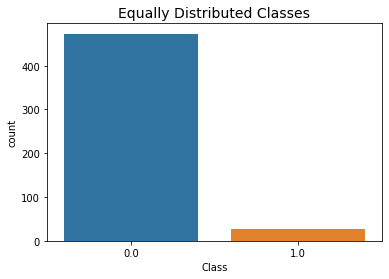

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_dataset['Class'].value_counts()/len(new_dataset))

sns.countplot('Class', data=new_dataset)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

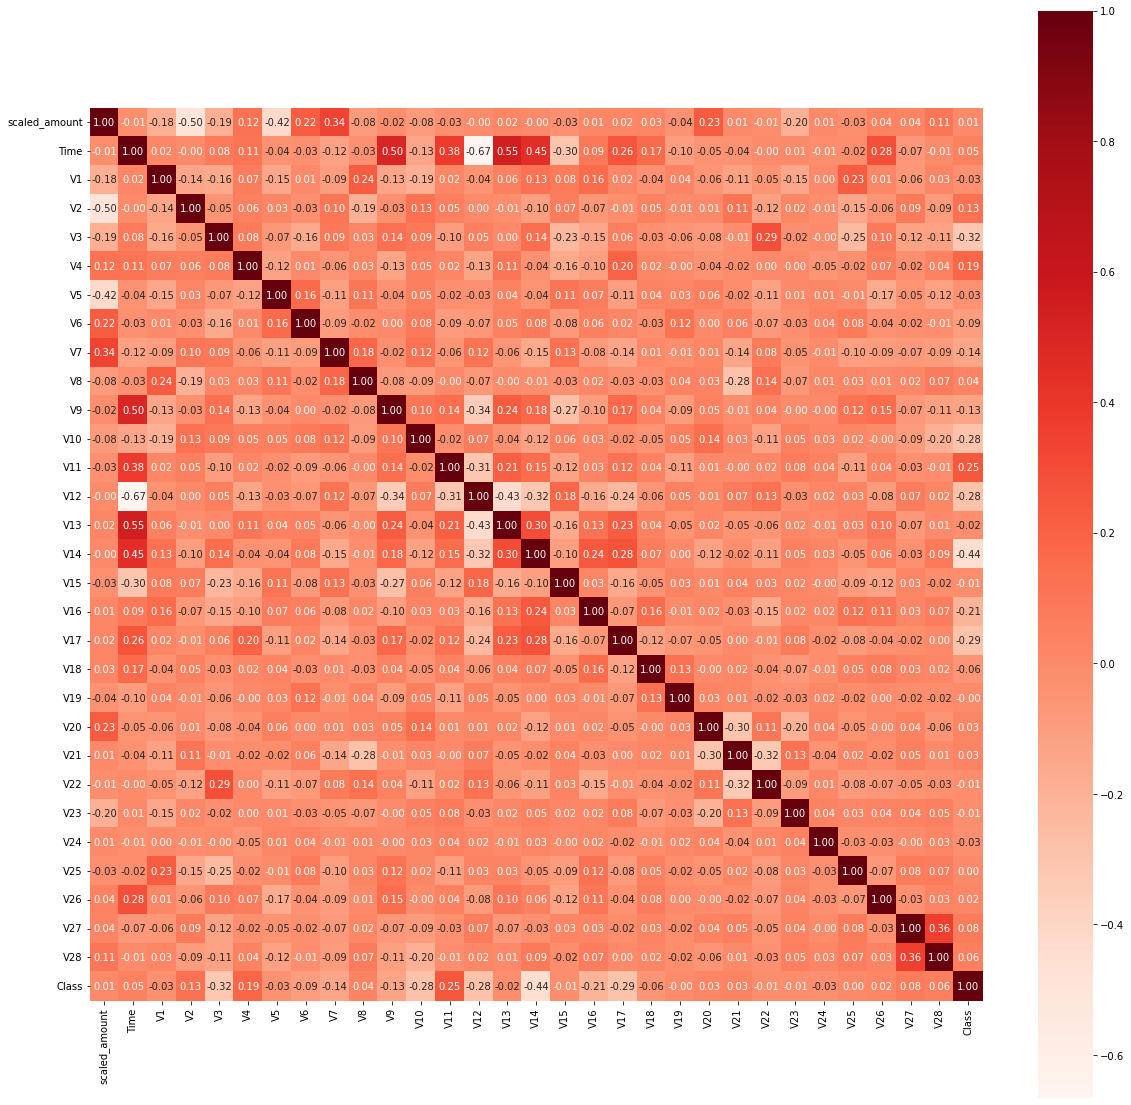

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Reds')

Heatmap of Subsample

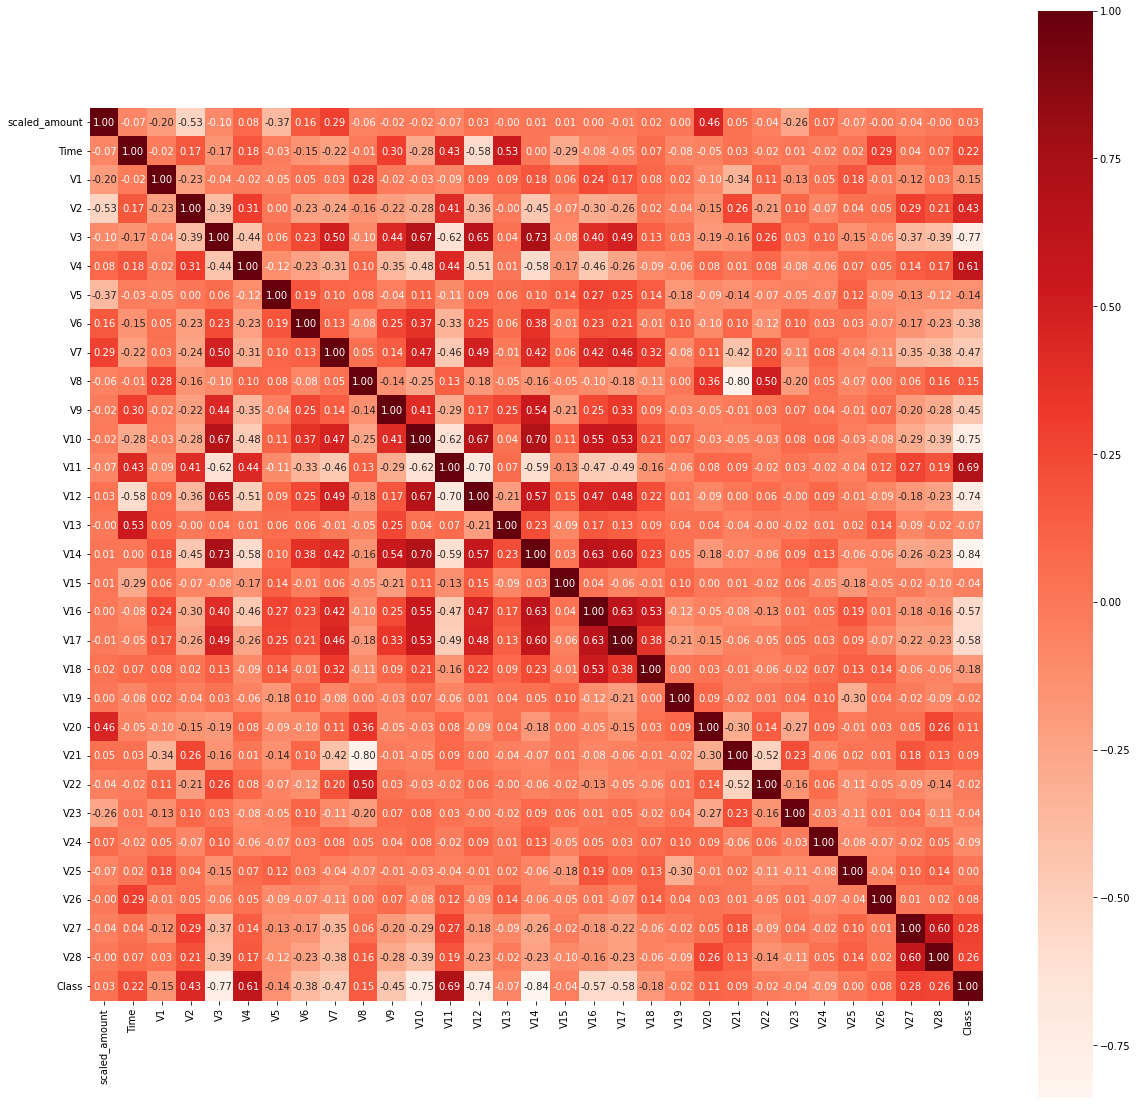

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(new_dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Reds')
# as we can see now there is high correlation of independent variables with Class.

Splitting the dataset into traning and test data

In [ ]:
x = new_dataset.drop(['Time', 'Class'], axis=1)
y = new_dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(400, 29) (101, 29)


Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy score:",(round(accuracy_score(y_test, y_pred)*100, 2)),'%')

Accuracy score: 99.01 %


Confusion Matrix

[Text(0, 0.5, ''), Text(0, 1.5, '')]

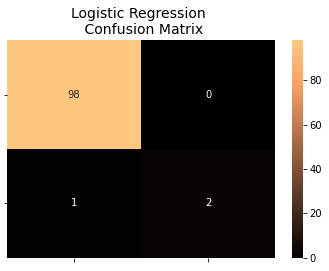

In [ ]:
log_reg_cf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        98
         1.0       1.00      0.67      0.80         3

    accuracy                           0.99       101
   macro avg       0.99      0.83      0.90       101
weighted avg       0.99      0.99      0.99       101



Creating a test case

In [ ]:
test_case_list = [239.93, -2.303349568, 1.75924746, -0.359744743, 2.330243051, -0.821628328, -0.075787571, 0.562319782, -0.399146578, -0.238253368, -1.525411627, 2.032912158, -6.560124295, 0.022937323, -1.470101536, -0.698826069, -2.282193829, -4.781830856, -2.615664945, -1.334441067, -0.430021867, -0.294166318, -0.932391057, 0.172726296, -0.087329538, -0.156114265, -0.542627889, 0.039565989, -0.153028797]

test_case_df = pd.DataFrame(test_case_list)               # converting the list into a dataframe
test_case = test_case_df.T                                # the shape of current df is (11,1) and the required shape is (1,11)
test_case_prediction = model.predict(test_case)           # predicting the quality for test case
if(test_case_prediction == 0):                            # generating the result.
    print('The Transaction was Legit')
else:
    print('The Transaction was Fraud.')

The Transaction was Fraud.
